# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q=" + "houston"
# city_weather =  requests.get(url).json()
# city_weather

In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
              # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 0

             # Create endpoint URL with each city
    city_url = url+ "&q=" + city
    
               #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

            #Add 1 to the record count
    record_count += 1

           #Run an API request for each of the cities
    try:
                  # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url)
        response = city_weather.json()
        print(response)
        

                  #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

                #Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

               #If an error is experienced, skip the city
    except:
            
        print("City not found. Skipping...")
        pass
              
 #Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_url)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
{'coord': {'lon': 114.1577, 'lat': 22.2855}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.75, 'feels_like': 13.14, 'temp_min': 11.65, 'temp_max': 15.14, 'pressure': 1021, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 5.81, 'deg': 360}, 'clouds': {'all': 100}, 'dt': 1669938476, 'sys': {'type': 2, 'id': 2035800, 'country': 'HK', 'sunrise': 1669934808, 'sunset': 1669973927}, 'timezone': 28800, 'id': 1819729, 'name': 'Hong Kong', 'cod': 200}
Processing Record 2 of Set 1 | nyurba
{'coord': {'lon': 118.3319, 'lat': 63.2842}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.48, 'feels_like': -29.48, 'temp_min': -22.48, 'temp_max': -22.48, 'pressure': 1010, 'humidity': 96, 'sea_level': 1010, 'grnd_level': 995}, 'vis

{'coord': {'lon': 115.7667, 'lat': -32.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 16.61, 'feels_like': 16.28, 'temp_min': 16.16, 'temp_max': 18.52, 'pressure': 1010, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 126, 'gust': 2.68}, 'clouds': {'all': 0}, 'dt': 1669938517, 'sys': {'type': 2, 'id': 2001346, 'country': 'AU', 'sunrise': 1669928593, 'sunset': 1669979370}, 'timezone': 28800, 'id': 2068079, 'name': 'Kwinana', 'cod': 200}
Processing Record 18 of Set 1 | belushya guba
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 19 of Set 1 | zhanatas
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 20 of Set 1 | meulaboh
{'coord': {'lon': 96.1285, 'lat': 4.1363}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 23.48, 'fe

{'coord': {'lon': 15.95, 'lat': -17.9167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22, 'feels_like': 20.93, 'temp_min': 22, 'temp_max': 22, 'pressure': 1010, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 60}, 'clouds': {'all': 10}, 'dt': 1669938519, 'sys': {'type': 1, 'id': 2267, 'country': 'NA', 'sunrise': 1669954320, 'sunset': 1670001568}, 'timezone': 7200, 'id': 3354247, 'name': 'Ondangwa', 'cod': 200}
Processing Record 34 of Set 1 | chuy
{'coord': {'lon': -53.4616, 'lat': -33.6971}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 20.4, 'feels_like': 21.03, 'temp_min': 20.4, 'temp_max': 20.4, 'pressure': 1007, 'humidity': 97, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.06, 'deg': 77, 'gust': 6.89}, 'clouds': {'all': 38}, 'dt': 1669938519, 'sys': {'country': 'UY

{'coord': {'lon': 15.1594, 'lat': -26.6481}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.12, 'feels_like': 17.11, 'temp_min': 17.12, 'temp_max': 17.12, 'pressure': 1012, 'humidity': 85, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.68, 'deg': 170, 'gust': 13.75}, 'clouds': {'all': 0}, 'dt': 1669938521, 'sys': {'country': 'NA', 'sunrise': 1669953489, 'sunset': 1670002778}, 'timezone': 7200, 'id': 3355672, 'name': 'Lüderitz', 'cod': 200}
Processing Record 50 of Set 1 | rundu
{'coord': {'lon': 19.7667, 'lat': -17.9333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.81, 'feels_like': 19.81, 'temp_min': 20.81, 'temp_max': 20.81, 'pressure': 1009, 'humidity': 33, 'sea_level': 1009, 'grnd_level': 888}, 'visibility': 10000, 'wind': {'speed': 2.4, 'deg': 54, 'gust': 4.31}, 'clouds': {'all': 0}, 'dt': 

{'coord': {'lon': -56.1549, 'lat': 72.7868}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -19.22, 'feels_like': -26.22, 'temp_min': -19.22, 'temp_max': -19.22, 'pressure': 1029, 'humidity': 100, 'sea_level': 1029, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'speed': 8.53, 'deg': 21, 'gust': 10.2}, 'clouds': {'all': 77}, 'dt': 1669938524, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 3418910, 'name': 'Upernavik', 'cod': 200}
Processing Record 15 of Set 2 | mandalgovi
{'coord': {'lon': 106.2708, 'lat': 45.7625}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -16.47, 'feels_like': -23.47, 'temp_min': -16.47, 'temp_max': -16.47, 'pressure': 1025, 'humidity': 49, 'sea_level': 1025, 'grnd_level': 851}, 'visibility': 10000, 'wind': {'speed': 6.38, 'deg': 316, 'gust': 13.74}, 'clouds': {'all': 0}, 

{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 5.91, 'feels_like': 2.41, 'temp_min': 5.91, 'temp_max': 5.91, 'pressure': 1030, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1669938527, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}
Processing Record 29 of Set 2 | oranjemund
{'coord': {'lon': 16.4333, 'lat': -28.55}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 16.56, 'feels_like': 16.73, 'temp_min': 16.56, 'temp_max': 16.56, 'pressure': 1015, 'humidity': 94, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 173, 'gust': 8.28}, 'clouds': {'all': 16}, 'dt': 1669938527, 'sys': {'country': 'NA', 'su

{'coord': {'lon': 23.6821, 'lat': 70.6634}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 2.25, 'feels_like': 2.25, 'temp_min': 2.25, 'temp_max': 2.25, 'pressure': 1038, 'humidity': 100}, 'visibility': 250, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1669938530, 'sys': {'type': 1, 'id': 1632, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 779683, 'name': 'Hammerfest', 'cod': 200}
Processing Record 49 of Set 2 | illoqqortoormiut
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 0 of Set 3 | te anau
{'coord': {'lon': 167.7167, 'lat': -45.4167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 12.74, 'feels_like': 11.17, 'temp_min': 12.74, 'temp_max': 12.74, 'pressure': 1009, 'humidity': 42, 'sea_level': 1009, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'s

{'coord': {'lon': 15.0613, 'lat': -7.6087}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.64, 'feels_like': 20.22, 'temp_min': 19.64, 'temp_max': 19.64, 'pressure': 1011, 'humidity': 98, 'sea_level': 1011, 'grnd_level': 919}, 'visibility': 10000, 'wind': {'speed': 0.64, 'deg': 140, 'gust': 1.03}, 'clouds': {'all': 99}, 'dt': 1669938532, 'sys': {'country': 'AO', 'sunrise': 1669955600, 'sunset': 1670000715}, 'timezone': 3600, 'id': 2236568, 'name': 'Uíge', 'cod': 200}
Processing Record 17 of Set 3 | kamenka
{'coord': {'lon': 42.7678, 'lat': 51.3223}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -5.63, 'feels_like': -10.1, 'temp_min': -5.63, 'temp_max': -5.63, 'pressure': 1042, 'humidity': 74, 'sea_level': 1042, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 2.85, 'deg': 97, 'gust': 4.64}, 'clouds': {'all'

{'coord': {'lon': 16.9833, 'lat': -24.8333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 22.77, 'feels_like': 22.38, 'temp_min': 22.77, 'temp_max': 22.77, 'pressure': 1011, 'humidity': 49, 'sea_level': 1011, 'grnd_level': 867}, 'visibility': 10000, 'wind': {'speed': 0.55, 'deg': 188, 'gust': 0.7}, 'clouds': {'all': 36}, 'dt': 1669938534, 'sys': {'country': 'NA', 'sunrise': 1669953277, 'sunset': 1670002115}, 'timezone': 7200, 'id': 3355624, 'name': 'Maltahöhe', 'cod': 200}
Processing Record 31 of Set 3 | yulara
{'coord': {'lon': 130.9889, 'lat': -25.2406}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.89, 'feels_like': 28.05, 'temp_min': 29.89, 'temp_max': 29.89, 'pressure': 1011, 'humidity': 14, 'sea_level': 1011, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 54, 'gust': 5.01}, 'clouds': {'all': 0

{'coord': {'lon': 164.0167, 'lat': -20.2333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.69, 'feels_like': 31.75, 'temp_min': 27.69, 'temp_max': 27.69, 'pressure': 1004, 'humidity': 83, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 7.57, 'deg': 348, 'gust': 9.17}, 'rain': {'1h': 0.32}, 'clouds': {'all': 97}, 'dt': 1669938535, 'sys': {'country': 'NC', 'sunrise': 1669918524, 'sunset': 1669966273}, 'timezone': 39600, 'id': 2138555, 'name': 'Poum', 'cod': 200}
Processing Record 46 of Set 3 | saint george
{'coord': {'lon': -113.5841, 'lat': 37.1041}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 11.48, 'feels_like': 9.65, 'temp_min': 11, 'temp_max': 12.46, 'pressure': 1015, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 180, 'gust': 1.34}, 'clouds': {'all': 20}, 'dt': 166993853

{'coord': {'lon': -173.3, 'lat': 64.3833}, 'weather': [{'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 2.06, 'feels_like': -2.84, 'temp_min': 1.87, 'temp_max': 2.06, 'pressure': 1015, 'humidity': 93}, 'visibility': 1000, 'wind': {'speed': 6, 'deg': 190}, 'rain': {'1h': 0.4}, 'clouds': {'all': 100}, 'dt': 1669938538, 'sys': {'type': 1, 'id': 8875, 'country': 'RU', 'sunrise': 1670014692, 'sunset': 1670032060}, 'timezone': 43200, 'id': 4031574, 'name': 'Provideniya', 'cod': 200}
Processing Record 14 of Set 4 | yueyang
{'coord': {'lon': 113.0919, 'lat': 29.3333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -0.01, 'feels_like': -0.01, 'temp_min': -0.01, 'temp_max': -0.01, 'pressure': 1031, 'humidity': 78, '

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 28 of Set 4 | bogorodskoye
{'coord': {'lon': 37.8833, 'lat': 56.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -11.58, 'feels_like': -15.48, 'temp_min': -11.58, 'temp_max': -11.58, 'pressure': 1044, 'humidity': 96, 'sea_level': 1044, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 1.75, 'deg': 128, 'gust': 1.9}, 'clouds': {'all': 95}, 'dt': 1669938540, 'sys': {'country': 'RU', 'sunrise': 1669959604, 'sunset': 1669985753}, 'timezone': 10800, 'id': 575521, 'name': 'Bogorodskoye', 'cod': 200}
Processing Record 29 of Set 4 | zhaotong
{'coord': {'lon': 103.7167, 'lat': 27.3167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.38, 'feels_like': -1.06, 'temp_min': 0.38, 'temp_max': 0.38, 'pressure': 1022, 'humidity': 81, 'sea

{'coord': {'lon': 91.6333, 'lat': 24.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 16.41, 'feels_like': 16.04, 'temp_min': 16.41, 'temp_max': 16.41, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 0.55, 'deg': 52, 'gust': 0.58}, 'clouds': {'all': 47}, 'dt': 1669938542, 'sys': {'country': 'IN', 'sunrise': 1669940423, 'sunset': 1669979127}, 'timezone': 19800, 'id': 1266649, 'name': 'Khowai', 'cod': 200}
Processing Record 45 of Set 4 | barentsburg
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 46 of Set 4 | ilulissat
{'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -21.77, 'feels_like': -28.77, 'temp_min': -21.77, 'temp_max': -21.77, 'pressure': 1024, 'humidity': 81, 'sea_l

{'coord': {'lon': -91.7507, 'lat': 29.9502}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.52, 'feels_like': 11.92, 'temp_min': 10.99, 'temp_max': 16.04, 'pressure': 1026, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1669938544, 'sys': {'type': 1, 'id': 3312, 'country': 'US', 'sunrise': 1669898725, 'sunset': 1669936027}, 'timezone': -21600, 'id': 4328254, 'name': 'Iberia', 'cod': 200}
Processing Record 14 of Set 5 | newport
{'coord': {'lon': -2.9984, 'lat': 51.5877}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 2.38, 'feels_like': 0.7, 'temp_min': 0.37, 'temp_max': 4.3, 'pressure': 1028, 'humidity': 75, 'sea_level': 1028, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 51, 'gust': 1.78}, 'clouds': {'all': 17}, 'dt': 1669938266, 'sys': {'type': 2, '

{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -28.65, 'feels_like': -35.65, 'temp_min': -28.65, 'temp_max': -28.65, 'pressure': 1018, 'humidity': 100, 'sea_level': 1018, 'grnd_level': 955}, 'visibility': 918, 'wind': {'speed': 3.31, 'deg': 309, 'gust': 2.91}, 'clouds': {'all': 100}, 'dt': 1669938546, 'sys': {'country': 'RU', 'sunrise': 1669947761, 'sunset': 1669962250}, 'timezone': 32400, 'id': 2027296, 'name': 'Aykhal', 'cod': 200}
Processing Record 30 of Set 5 | halalo
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 31 of Set 5 | samarai
{'coord': {'lon': 150.6667, 'lat': -10.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.05, 'feels_like': 32.65, 'temp_min': 29.05, 'temp_max': 29.05, 'pressure': 1006, 'humidity': 69, 'sea_level': 10

{'coord': {'lon': 23.9167, 'lat': 47.0333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.28, 'feels_like': 4.28, 'temp_min': 4.28, 'temp_max': 4.39, 'pressure': 1023, 'humidity': 61, 'sea_level': 1023, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 0.88, 'deg': 95, 'gust': 0.87}, 'clouds': {'all': 100}, 'dt': 1669938548, 'sys': {'type': 2, 'id': 50394, 'country': 'RO', 'sunrise': 1669960232, 'sunset': 1669991831}, 'timezone': 7200, 'id': 677429, 'name': 'Gherla', 'cod': 200}
Processing Record 45 of Set 5 | hun
{'coord': {'lon': 15.9477, 'lat': 29.1268}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 12.7, 'feels_like': 11.07, 'temp_min': 12.7, 'temp_max': 12.7, 'pressure': 1019, 'humidity': 40, 'sea_level': 1019, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 142, 'gust': 3.8}, 'cl

{'coord': {'lon': -17.0347, 'lat': 20.931}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.99, 'feels_like': 17.72, 'temp_min': 17.99, 'temp_max': 17.99, 'pressure': 1015, 'humidity': 72}, 'visibility': 6000, 'wind': {'speed': 6.69, 'deg': 10}, 'clouds': {'all': 83}, 'dt': 1669938551, 'sys': {'type': 1, 'id': 2444, 'country': 'MR', 'sunrise': 1669879719, 'sunset': 1669919160}, 'timezone': 0, 'id': 2377457, 'name': 'Nouadhibou', 'cod': 200}
Processing Record 11 of Set 6 | pogranichnyy
{'coord': {'lon': 131.3769, 'lat': 44.4064}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -13.33, 'feels_like': -19.89, 'temp_min': -13.33, 'temp_max': -13.33, 'pressure': 1027, 'humidity': 57, 'sea_level': 1027, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.3, 'deg': 240, 'gust': 8.85}, 'clouds': {'all': 5}, 'dt': 1669938551, 'sys

{'coord': {'lon': -93.218, 'lat': 45.0205}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -0.94, 'feels_like': -6.73, 'temp_min': -1.73, 'temp_max': -0.06, 'pressure': 1013, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 160}, 'clouds': {'all': 0}, 'dt': 1669938553, 'sys': {'type': 2, 'id': 2077981, 'country': 'US', 'sunrise': 1669901471, 'sunset': 1669933986}, 'timezone': -21600, 'id': 5044290, 'name': 'Saint Anthony', 'cod': 200}
Processing Record 27 of Set 6 | inderborskiy
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 28 of Set 6 | praia da vitoria
{'coord': {'lon': -27.0667, 'lat': 38.7333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 13.14, 'feels_like': 12.36, 'temp_min': 13.14, 'temp_max': 13.2, 'pressure': 1027, 'humidity': 71}, 'visibility': 10000, 'w

{'coord': {'lon': 166.4372, 'lat': 68.0546}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -13.7, 'feels_like': -13.7, 'temp_min': -13.7, 'temp_max': -13.7, 'pressure': 999, 'humidity': 99, 'sea_level': 999, 'grnd_level': 962}, 'visibility': 2595, 'wind': {'speed': 0.8, 'deg': 277, 'gust': 0.78}, 'clouds': {'all': 100}, 'dt': 1669938556, 'sys': {'country': 'RU', 'sunrise': 1669937660, 'sunset': 1669945975}, 'timezone': 43200, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}
Processing Record 44 of Set 6 | saint-augustin
{'coord': {'lon': -58.6502, 'lat': 51.226}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.03, 'feels_like': -4.78, 'temp_min': 1.03, 'temp_max': 1.03, 'pressure': 996, 'humidity': 96, 'sea_level': 996, 'grnd_level': 996}, 'visibility': 9437, 'wind': {'speed': 7.46, 'deg': 220, 'gust': 12.45}, 'clouds': {'

{'coord': {'lon': 145.7966, 'lat': -5.2246}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.58, 'feels_like': 32, 'temp_min': 28.58, 'temp_max': 28.58, 'pressure': 1007, 'humidity': 71, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.88, 'deg': 285, 'gust': 4.34}, 'clouds': {'all': 100}, 'dt': 1669938558, 'sys': {'country': 'PG', 'sunrise': 1669924452, 'sunset': 1669969094}, 'timezone': 36000, 'id': 2091996, 'name': 'Madang', 'cod': 200}
Processing Record 9 of Set 7 | shetpe
{'coord': {'lon': 52.1167, 'lat': 44.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -3.58, 'feels_like': -7.35, 'temp_min': -3.58, 'temp_max': -3.58, 'pressure': 1036, 'humidity': 28, 'sea_level': 1036, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.58, 'deg': 77, 'gust': 3.27}, 'clouds': {'all': 0}, '

{'coord': {'lon': 139.8667, 'lat': 34.9833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.72, 'feels_like': 10.51, 'temp_min': 11.72, 'temp_max': 11.72, 'pressure': 1019, 'humidity': 60, 'sea_level': 1019, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 7.18, 'deg': 12, 'gust': 7.93}, 'clouds': {'all': 100}, 'dt': 1669938561, 'sys': {'type': 2, 'id': 20334, 'country': 'JP', 'sunrise': 1669930242, 'sunset': 1669966150}, 'timezone': 32400, 'id': 1850523, 'name': 'Tateyama', 'cod': 200}
Processing Record 23 of Set 7 | lisakovsk
{'coord': {'lon': 62.4936, 'lat': 52.5369}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -15.15, 'feels_like': -22.15, 'temp_min': -15.15, 'temp_max': -15.15, 'pressure': 1044, 'humidity': 90, 'sea_level': 1044, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 4.79, 'deg':

{'coord': {'lon': 104.2081, 'lat': 36.5583}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -7.62, 'feels_like': -7.62, 'temp_min': -7.62, 'temp_max': -7.62, 'pressure': 1026, 'humidity': 39, 'sea_level': 1026, 'grnd_level': 827}, 'visibility': 10000, 'wind': {'speed': 0.79, 'deg': 79, 'gust': 0.82}, 'clouds': {'all': 23}, 'dt': 1669938563, 'sys': {'country': 'CN', 'sunrise': 1669939040, 'sunset': 1669974473}, 'timezone': 28800, 'id': 1817240, 'name': 'Baiyin', 'cod': 200}
Processing Record 38 of Set 7 | higuey
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 39 of Set 7 | murmashi
{'coord': {'lon': 32.8115, 'lat': 68.8154}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.77, 'feels_like': -2.77, 'temp_min': -2.77, 'temp_max': -2.77, 'pressure': 1039, 'humidity': 100}, 'visibility': 1000

{'coord': {'lon': -59.5167, 'lat': 13.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.14, 'feels_like': 26.14, 'temp_min': 26.14, 'temp_max': 27.34, 'pressure': 1010, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1669938567, 'sys': {'type': 2, 'id': 2017042, 'country': 'BB', 'sunrise': 1669889112, 'sunset': 1669930165}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
Processing Record 5 of Set 8 | maceio
{'coord': {'lon': -35.7353, 'lat': -9.6658}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.69, 'feels_like': 26.48, 'temp_min': 25.69, 'temp_max': 25.69, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1669938543, 'sys': {'type': 1, 'id': 8413, 'country': 'BR', 'su

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 20 of Set 8 | setermoen
{'coord': {'lon': 18.3486, 'lat': 68.861}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.02, 'feels_like': -5.61, 'temp_min': -2.02, 'temp_max': -2.02, 'pressure': 1039, 'humidity': 91, 'sea_level': 1039, 'grnd_level': 1030}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 140, 'gust': 2.33}, 'clouds': {'all': 76}, 'dt': 1669938571, 'sys': {'type': 1, 'id': 1619, 'country': 'NO', 'sunrise': 1669976564, 'sunset': 1669978172}, 'timezone': 3600, 'id': 3139765, 'name': 'Setermoen', 'cod': 200}
Processing Record 21 of Set 8 | paamiut
{'coord': {'lon': -49.6678, 'lat': 61.994}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -9.15, 'feels_like': -14.75, 'temp_min': -9.15, 'temp_max': -9.15, 'pressure': 1009, 'h

{'coord': {'lon': 8.8879, 'lat': 14.9709}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18.82, 'feels_like': 17.44, 'temp_min': 18.82, 'temp_max': 18.82, 'pressure': 1013, 'humidity': 26, 'sea_level': 1013, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 4.65, 'deg': 45, 'gust': 6.08}, 'clouds': {'all': 13}, 'dt': 1669938573, 'sys': {'country': 'NE', 'sunrise': 1669959300, 'sunset': 1669999979}, 'timezone': 3600, 'id': 2439155, 'name': 'Tanout', 'cod': 200}
Processing Record 37 of Set 8 | san joaquin
{'coord': {'lon': -121.3011, 'lat': 37.9333}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}, {'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 8.53, 'feels_like': 6.4, 'temp_min': 7.49, 'temp_max': 9.5, 'pressure': 1012, 'humidity': 91}, 'visibility': 8047, 'wind': {'speed': 3.6, 'deg': 300}, 'rain': {'1h'

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 2 of Set 9 | kaitangata
{'coord': {'lon': 169.8464, 'lat': -46.2817}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 10.26, 'feels_like': 9.27, 'temp_min': 10.26, 'temp_max': 10.26, 'pressure': 1009, 'humidity': 74, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.68, 'deg': 223, 'gust': 9.18}, 'clouds': {'all': 50}, 'dt': 1669938576, 'sys': {'country': 'NZ', 'sunrise': 1669913097, 'sunset': 1669968901}, 'timezone': 46800, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
Processing Record 3 of Set 9 | mountain home
{'coord': {'lon': -115.6912, 'lat': 43.133}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 1.71, 'feels_lik

{'coord': {'lon': 151.7833, 'lat': -32.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.51, 'feels_like': 20.97, 'temp_min': 19.92, 'temp_max': 21.95, 'pressure': 1016, 'humidity': 48, 'sea_level': 1016, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 4.46, 'deg': 145, 'gust': 6.08}, 'clouds': {'all': 100}, 'dt': 1669938578, 'sys': {'type': 1, 'id': 9605, 'country': 'AU', 'sunrise': 1669919902, 'sunset': 1669970769}, 'timezone': 39600, 'id': 2171465, 'name': 'Clarence Town', 'cod': 200}
Processing Record 18 of Set 9 | sinnamary
{'coord': {'lon': -52.95, 'lat': 5.3833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.35, 'feels_like': 26.21, 'temp_min': 25.35, 'temp_max': 25.35, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.4, 'deg': 83

{'coord': {'lon': 81.1185, 'lat': 6.1241}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.43, 'feels_like': 25.2, 'temp_min': 24.43, 'temp_max': 24.43, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.32, 'deg': 22, 'gust': 3.97}, 'clouds': {'all': 73}, 'dt': 1669938580, 'sys': {'country': 'LK', 'sunrise': 1669941077, 'sunset': 1669983522}, 'timezone': 19800, 'id': 1244926, 'name': 'Hambantota', 'cod': 200}
Processing Record 35 of Set 9 | mackay
{'coord': {'lon': 149.2, 'lat': -21.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.49, 'feels_like': 26.49, 'temp_min': 26.49, 'temp_max': 26.49, 'pressure': 1009, 'humidity': 64, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.6, 'deg': 157, 'gust': 6.31}, 'clouds': {'all': 

{'coord': {'lon': 124.8925, 'lat': -9.1061}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.67, 'feels_like': 27.99, 'temp_min': 26.67, 'temp_max': 26.67, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 0.49, 'deg': 58, 'gust': 0.91}, 'clouds': {'all': 58}, 'dt': 1669938583, 'sys': {'country': 'ID', 'sunrise': 1669929086, 'sunset': 1669974495}, 'timezone': 28800, 'id': 1651103, 'name': 'Atambua', 'cod': 200}
Processing Record 1 of Set 10 | malartic
{'coord': {'lon': -78.1328, 'lat': 48.1335}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -8.94, 'feels_like': -15.19, 'temp_min': -8.94, 'temp_max': -8.94, 'pressure': 1025, 'humidity': 80, 'sea_level': 1025, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 3.92, 'deg': 275, 'gust': 10.76}, 'clouds': {

{'coord': {'lon': 153.6833, 'lat': 67.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -32.56, 'feels_like': -39.56, 'temp_min': -32.56, 'temp_max': -32.56, 'pressure': 999, 'humidity': 92, 'sea_level': 999, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 4.05, 'deg': 200, 'gust': 6.69}, 'clouds': {'all': 79}, 'dt': 1669938585, 'sys': {'country': 'RU', 'sunrise': 1669939571, 'sunset': 1669950187}, 'timezone': 39600, 'id': 2121025, 'name': 'Srednekolymsk', 'cod': 200}
Processing Record 17 of Set 10 | thinadhoo
{'coord': {'lon': 72.9333, 'lat': 0.5333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.98, 'feels_like': 28.9, 'temp_min': 26.98, 'temp_max': 26.98, 'pressure': 1009, 'humidity': 71, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 297, 'gust': 2.58}, 'cloud

{'coord': {'lon': 111.9667, 'lat': 21.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.16, 'feels_like': 10.45, 'temp_min': 11.16, 'temp_max': 11.16, 'pressure': 1021, 'humidity': 81, 'sea_level': 1021, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 5.02, 'deg': 14, 'gust': 7.27}, 'clouds': {'all': 91}, 'dt': 1669938587, 'sys': {'country': 'CN', 'sunrise': 1669935286, 'sunset': 1669974502}, 'timezone': 28800, 'id': 1806408, 'name': 'Yangjiang', 'cod': 200}
Processing Record 32 of Set 10 | babanka
{'coord': {'lon': 30.4483, 'lat': 48.7097}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.82, 'feels_like': -5.01, 'temp_min': -0.82, 'temp_max': -0.82, 'pressure': 1028, 'humidity': 67, 'sea_level': 1028, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.63, 'deg': 73, 'gust': 7.14}, 'clouds': {

{'coord': {'lon': 163.0719, 'lat': 59.2353}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -10.99, 'feels_like': -17.3, 'temp_min': -10.99, 'temp_max': -10.99, 'pressure': 1005, 'humidity': 74, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.52, 'deg': 270, 'gust': 3.91}, 'clouds': {'all': 20}, 'dt': 1669938590, 'sys': {'country': 'RU', 'sunrise': 1669930646, 'sunset': 1669954604}, 'timezone': 43200, 'id': 2122389, 'name': 'Ossora', 'cod': 200}
Processing Record 49 of Set 10 | abu kamal
{'coord': {'lon': 40.9171, 'lat': 34.4506}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 13.96, 'feels_like': 13.45, 'temp_min': 13.96, 'temp_max': 13.96, 'pressure': 1020, 'humidity': 78, 'sea_level': 1020, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 3.33, 'deg': 277, 'gust': 3.77}, 'clouds': 

{'coord': {'lon': 20.1347, 'lat': 54.675}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 0.03, 'feels_like': -2.76, 'temp_min': -0.58, 'temp_max': 0.03, 'pressure': 1031, 'humidity': 90, 'sea_level': 1031, 'grnd_level': 1030}, 'visibility': 10000, 'wind': {'speed': 2.29, 'deg': 90, 'gust': 2.65}, 'clouds': {'all': 38}, 'dt': 1669938390, 'sys': {'type': 1, 'id': 8934, 'country': 'RU', 'sunrise': 1669963204, 'sunset': 1669990675}, 'timezone': 7200, 'id': 485660, 'name': 'Tsimmerbude', 'cod': 200}
Processing Record 16 of Set 11 | axim
{'coord': {'lon': -2.2405, 'lat': 4.8699}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.68, 'feels_like': 26.55, 'temp_min': 25.68, 'temp_max': 25.68, 'pressure': 1010, 'humidity': 86, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.04, 'deg': 207, 'gust': 3.4

{'coord': {'lon': 10.7002, 'lat': 46.6166}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.74, 'feels_like': 1.74, 'temp_min': -2.39, 'temp_max': 3.49, 'pressure': 1022, 'humidity': 79, 'sea_level': 1022, 'grnd_level': 918}, 'visibility': 10000, 'wind': {'speed': 0.44, 'deg': 245, 'gust': 1.47}, 'clouds': {'all': 96}, 'dt': 1669938595, 'sys': {'type': 1, 'id': 6813, 'country': 'IT', 'sunrise': 1669963315, 'sunset': 1669995094}, 'timezone': 3600, 'id': 3175096, 'name': 'Laas', 'cod': 200}
Processing Record 30 of Set 11 | opuwo
{'coord': {'lon': 13.84, 'lat': -18.0607}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 21.91, 'feels_like': 21.51, 'temp_min': 21.91, 'temp_max': 21.91, 'pressure': 1009, 'humidity': 52, 'sea_level': 1009, 'grnd_level': 885}, 'visibility': 10000, 'wind': {'speed': 2.75, 'deg': 255, 'gust': 3.76}

{'coord': {'lon': -10.0711, 'lat': 20.5022}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.07, 'feels_like': 18.65, 'temp_min': 20.07, 'temp_max': 20.07, 'pressure': 1013, 'humidity': 20, 'sea_level': 1013, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 3.61, 'deg': 44, 'gust': 3.64}, 'clouds': {'all': 0}, 'dt': 1669938597, 'sys': {'country': 'MR', 'sunrise': 1669878001, 'sunset': 1669917536}, 'timezone': 0, 'id': 2381972, 'name': 'Adrar', 'cod': 200}
Processing Record 45 of Set 11 | lagoa
{'coord': {'lon': -27.9833, 'lat': 39.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.94, 'feels_like': 12.67, 'temp_min': 13.94, 'temp_max': 13.94, 'pressure': 1029, 'humidity': 49, 'sea_level': 1029, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 11.73, 'deg': 345, 'gust': 14.65}, 'clouds': {'all': 58}, 'dt':

{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.14, 'feels_like': 26.14, 'temp_min': 26.14, 'temp_max': 26.14, 'pressure': 1012, 'humidity': 69, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.31, 'deg': 89, 'gust': 8.5}, 'clouds': {'all': 23}, 'dt': 1669938599, 'sys': {'country': 'BR', 'sunrise': 1669881547, 'sunset': 1669926180}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
Processing Record 10 of Set 12 | erenhot
{'coord': {'lon': 111.9767, 'lat': 43.6475}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -12, 'feels_like': -19, 'temp_min': -12, 'temp_max': -12, 'pressure': 1022, 'humidity': 51, 'sea_level': 1022, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 246, 'gust': 11.29}, 'clouds': {'all': 100},

{'coord': {'lon': 167.1667, 'lat': -15.5333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.51, 'feels_like': 35.78, 'temp_min': 30.51, 'temp_max': 30.51, 'pressure': 1006, 'humidity': 68, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 5.62, 'deg': 9, 'gust': 6.79}, 'clouds': {'all': 97}, 'dt': 1669938602, 'sys': {'country': 'VU', 'sunrise': 1669918280, 'sunset': 1669965004}, 'timezone': 39600, 'id': 2136150, 'name': 'Luganville', 'cod': 200}
Processing Record 25 of Set 12 | baikunthpur
{'coord': {'lon': 82.55, 'lat': 23.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.23, 'feels_like': 12.15, 'temp_min': 13.23, 'temp_max': 13.23, 'pressure': 1014, 'humidity': 59, 'sea_level': 1014, 'grnd_level': 951}, 'visibility': 10000, 'wind': {'speed': 1.52, 'deg': 34, 'gust': 1.43}, 'clouds': {'all'

{'coord': {'lon': 114.5636, 'lat': 29.0361}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.5, 'feels_like': 0.5, 'temp_min': 0.5, 'temp_max': 0.5, 'pressure': 1031, 'humidity': 93, 'sea_level': 1031, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 0.41, 'deg': 47, 'gust': 0.75}, 'clouds': {'all': 74}, 'dt': 1669938604, 'sys': {'country': 'CN', 'sunrise': 1669935513, 'sunset': 1669973028}, 'timezone': 28800, 'id': 1786538, 'name': 'Yining', 'cod': 200}
Processing Record 40 of Set 12 | yatou
{'coord': {'lon': 122.3833, 'lat': 37.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -1.51, 'feels_like': -4.29, 'temp_min': -1.51, 'temp_max': -1.51, 'pressure': 1032, 'humidity': 56, 'sea_level': 1032, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 288, 'gust': 3.17}, 'clouds': {'all': 34}, 

{'coord': {'lon': -60.6733, 'lat': 2.8197}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.99, 'feels_like': 29.55, 'temp_min': 27.99, 'temp_max': 27.99, 'pressure': 1005, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1669938606, 'sys': {'type': 1, 'id': 8340, 'country': 'BR', 'sunrise': 1669888372, 'sunset': 1669931459}, 'timezone': -14400, 'id': 3664980, 'name': 'Boa Vista', 'cod': 200}
Processing Record 6 of Set 13 | serenje
{'coord': {'lon': 30.2352, 'lat': -13.2325}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.08, 'feels_like': 16.91, 'temp_min': 17.08, 'temp_max': 17.08, 'pressure': 1012, 'humidity': 79, 'sea_level': 1012, 'grnd_level': 859}, 'visibility': 10000, 'wind': {'speed': 1.15, 'deg': 81, 'gust': 1.18}, 'clouds': {'all': 51}, 'dt': 1669938607, 'sys': {'

{'coord': {'lon': 29.0864, 'lat': 70.8578}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.11, 'feels_like': -1.94, 'temp_min': -1.11, 'temp_max': 1, 'pressure': 1038, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 220}, 'clouds': {'all': 100}, 'dt': 1669938609, 'sys': {'type': 1, 'id': 1620, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 780687, 'name': 'Berlevåg', 'cod': 200}
Processing Record 20 of Set 13 | jamalpur
{'coord': {'lon': 89.9333, 'lat': 24.9167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 17.24, 'feels_like': 16.9, 'temp_min': 17.24, 'temp_max': 17.24, 'pressure': 1012, 'humidity': 72, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.12, 'deg': 342, 'gust': 3.96}, 'rain': {'1h': 0.12}, 'clouds': {'all': 0}, 'dt': 1669938609, 'sys': 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,victoria,22.2855,114.1577,15.14,75,100,5.81,HK,1669938476
1,nyurba,63.2842,118.3319,-22.48,96,100,3.25,RU,1669938515
2,bredasdorp,-34.5322,20.0403,17.31,84,51,3.74,ZA,1669938515
3,bluff,-46.6000,168.3333,10.45,58,60,7.55,NZ,1669938515
4,tasiilaq,65.6145,-37.6368,0.09,71,74,3.55,GL,1669938515


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,victoria,22.2855,114.1577,15.14,75,100,5.81,HK,1669938476
1,nyurba,63.2842,118.3319,-22.48,96,100,3.25,RU,1669938515
2,bredasdorp,-34.5322,20.0403,17.31,84,51,3.74,ZA,1669938515
3,bluff,-46.6000,168.3333,10.45,58,60,7.55,NZ,1669938515
4,tasiilaq,65.6145,-37.6368,0.09,71,74,3.55,GL,1669938515


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

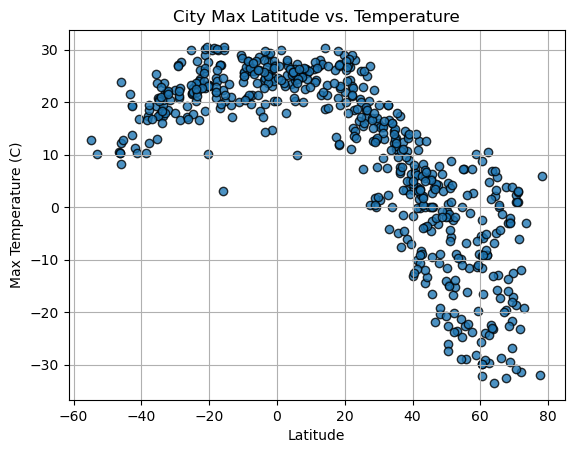

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

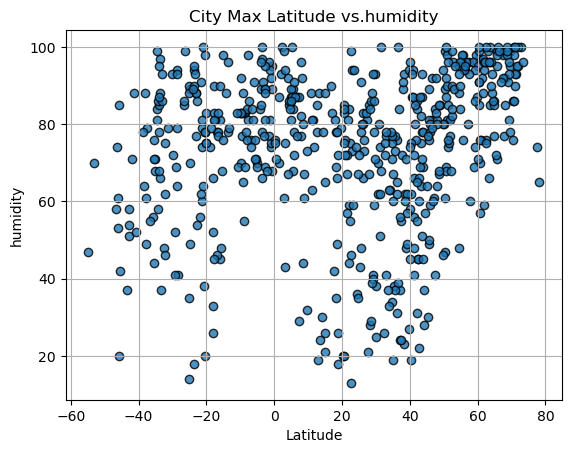

In [10]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs.humidity")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

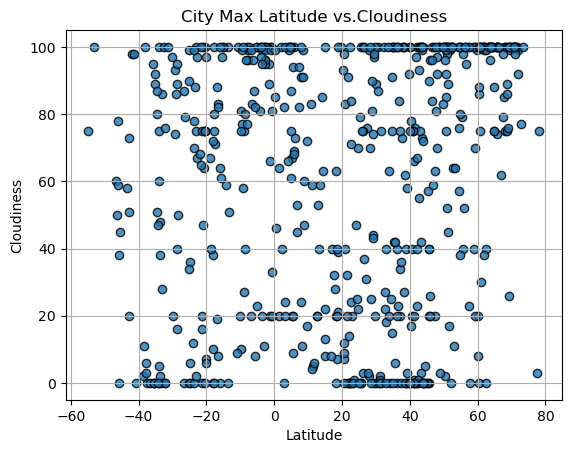

In [11]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

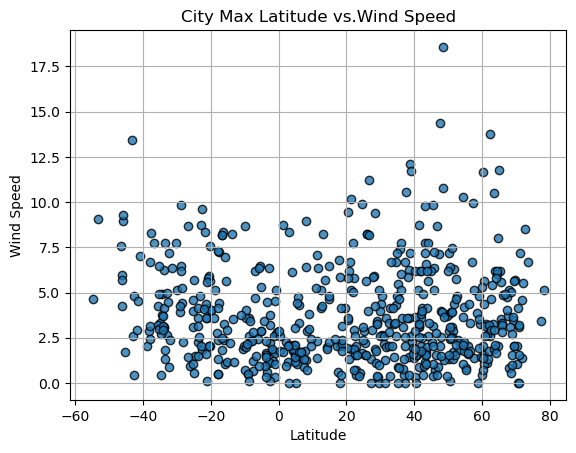

In [12]:
# Build the scatter plots for latitude vs. wind speed


plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# 

In [14]:
# Create a DataFrame with the Northern Hemisphre data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,victoria,22.2855,114.1577,15.14,75,100,5.81,HK,1669938476
1,nyurba,63.2842,118.3319,-22.48,96,100,3.25,RU,1669938515
4,tasiilaq,65.6145,-37.6368,0.09,71,74,3.55,GL,1669938515
8,vanavara,60.3400,102.2797,-29.91,97,86,2.03,RU,1669938516
9,vestmannaeyjar,63.4427,-20.2734,6.82,66,100,10.52,IS,1669938516


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,17.31,84,51,3.74,ZA,1669938515
3,bluff,-46.6000,168.3333,10.45,58,60,7.55,NZ,1669938515
5,punta arenas,-53.1500,-70.9167,10.16,70,100,9.05,CL,1669938224
6,assis,-22.6617,-50.4122,24.44,54,67,1.83,BR,1669938226
7,rikitea,-23.1203,-134.9692,23.72,77,100,4.78,PF,1669938516


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between Temperature and Latitude for Northern is -0.82


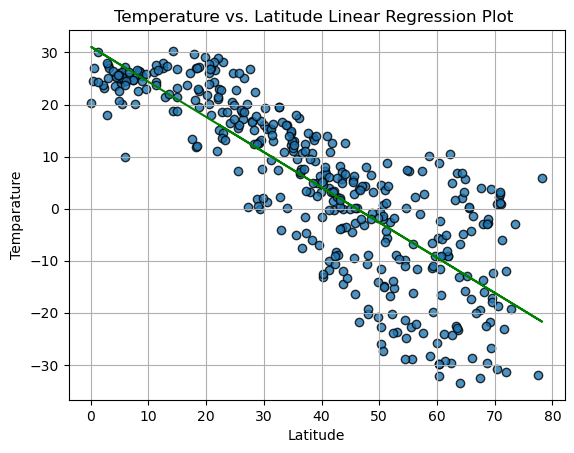

In [16]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis =  northern_hemi_df["Max Temp"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation =st.pearsonr(x_axis,y_axis)


plt.scatter(     
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
   
)
plt.plot(x_axis,m_fit,"g-")
plt.title("Temperature vs. Latitude Linear Regression Plot ")
plt.xlabel("Latitude")
plt.ylabel("Temparature")
plt.grid(True)

print(f"The correlation coefficient between Temperature and Latitude for Northern is {round(correlation[0],2)}")





The correlation coefficient between Temperature and Latitude for Southern is 0.57


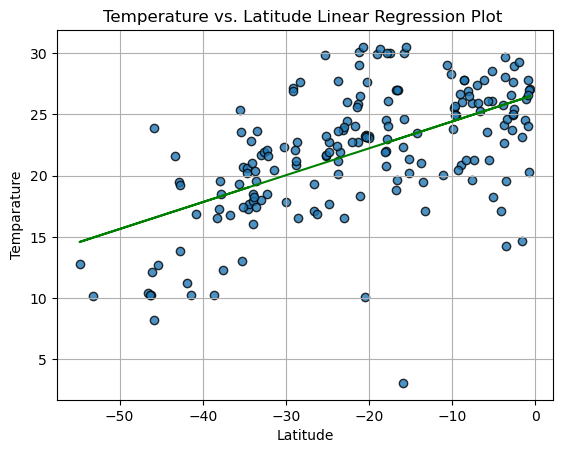

In [17]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis =  southern_hemi_df["Max Temp"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation =st.pearsonr(x_axis,y_axis)


plt.scatter(     
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
   
)
plt.plot(x_axis,m_fit,"g-")
plt.title("Temperature vs. Latitude Linear Regression Plot ")
plt.xlabel("Latitude")
plt.ylabel("Temparature")
plt.grid(True)

print(f"The correlation coefficient between Temperature and Latitude for Southern is {round(correlation[0],2)}")


**Discussion about the linear relationship:** 

Scatter plot between max temperature vs Latitude for northern and southern hemisphre.
There is a high corelation between temperature vs Latitude (distance from equator). Closer to the equator higher the temperature

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient between Humidity and Latitude for Northern is 0.31


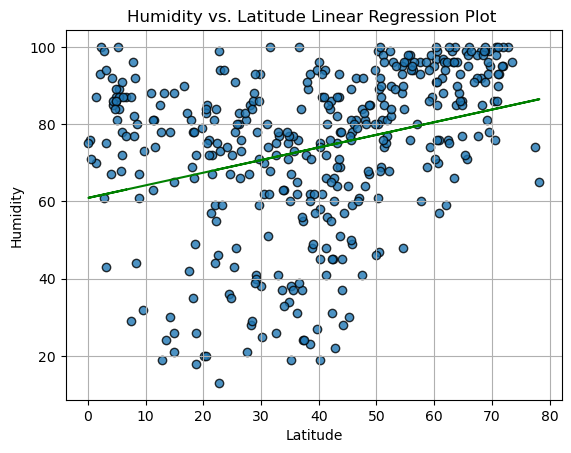

In [18]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis =  northern_hemi_df["Humidity"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation =st.pearsonr(x_axis,y_axis)


plt.scatter(     
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
   
)
plt.plot(x_axis,m_fit,"g-")
plt.title("Humidity vs. Latitude Linear Regression Plot ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
print(f"The correlation coefficient between Humidity and Latitude for Northern is {round(correlation[0],2)}")


The correlation coefficient between Humidity and Latitude for Southern is 0.33


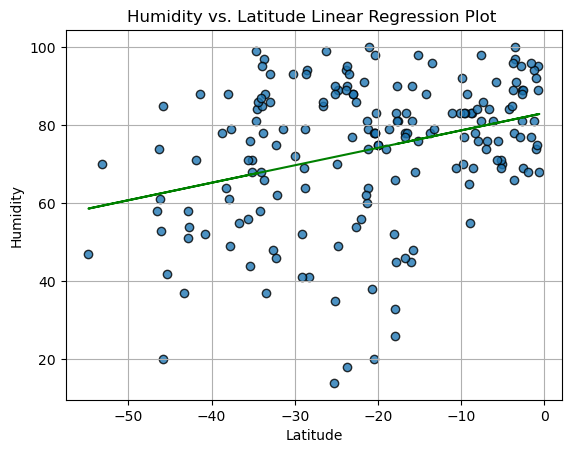

In [19]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis =  southern_hemi_df["Humidity"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation =st.pearsonr(x_axis,y_axis)


plt.scatter(     
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
   
)
plt.plot(x_axis,m_fit,"g-")
plt.title("Humidity vs. Latitude Linear Regression Plot ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

print(f"The correlation coefficient between Humidity and Latitude for Southern is {round(correlation[0],2)}")


**Discussion about the linear relationship:** 
Scatter plot between Humidity vs Latitude for northern and southern hemisphre.
There is no corelation between humidity vs Latitude (distance from equator). 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient between Cloudiness and Latitude for Northern is 0.3


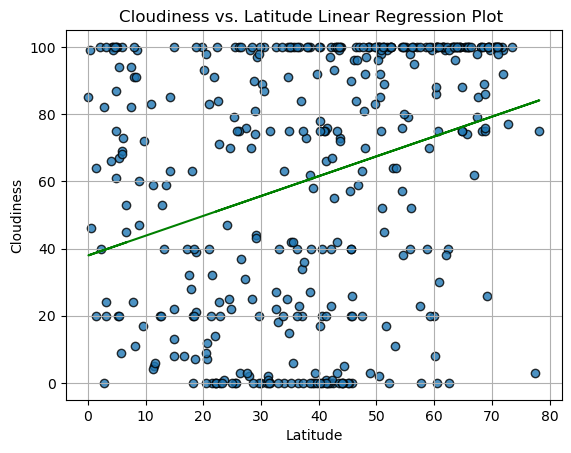

In [20]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis =  northern_hemi_df["Cloudiness"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation =st.pearsonr(x_axis,y_axis)


plt.scatter(     
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
   
)
plt.plot(x_axis,m_fit,"g-")
plt.title("Cloudiness vs. Latitude Linear Regression Plot ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
print(f"The correlation coefficient between Cloudiness and Latitude for Northern is {round(correlation[0],2)}")


The correlation coefficient between Cloudiness and Latitude for Southern is 0.28


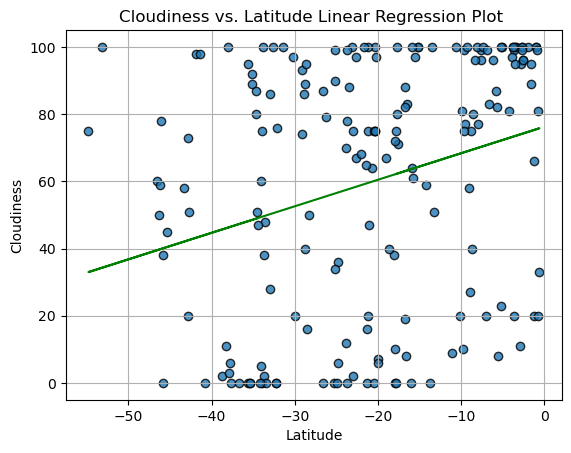

In [21]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis =  southern_hemi_df["Cloudiness"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation =st.pearsonr(x_axis,y_axis)


plt.scatter(     
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
   
)
plt.plot(x_axis,m_fit,"g-")
plt.title("Cloudiness vs. Latitude Linear Regression Plot ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

print(f"The correlation coefficient between Cloudiness and Latitude for Southern is {round(correlation[0],2)}")


**Discussion about the linear relationship:** 
Scatter plot between Cloudiness vs Latitude for northern and southern hemisphre.
There is no corelation between cloudiness vs Latitude (distance from equator). 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient between Wind Speed and Latitude for Northern is 0.09


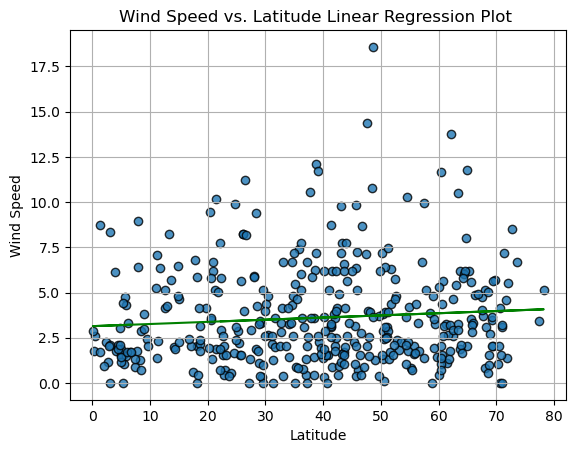

In [22]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis =  northern_hemi_df["Wind Speed"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation =st.pearsonr(x_axis,y_axis)


plt.scatter(     
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
   
)
plt.plot(x_axis,m_fit,"g-")
plt.title("Wind Speed vs. Latitude Linear Regression Plot ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

print(f"The correlation coefficient between Wind Speed and Latitude for Northern is {round(correlation[0],2)}")


The correlation coefficient between Wind Speed and Latitude for Southern is -0.35


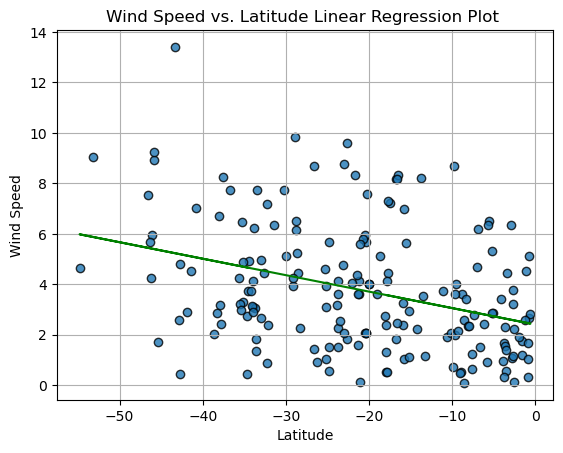

In [23]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis =  southern_hemi_df["Wind Speed"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation =st.pearsonr(x_axis,y_axis)


plt.scatter(     
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
   
)
plt.plot(x_axis,m_fit,"g-")
plt.title("Wind Speed vs. Latitude Linear Regression Plot ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
print(f"The correlation coefficient between Wind Speed and Latitude for Southern is {round(correlation[0],2)}")


**Discussion about the linear relationship:** 
Scatter plot between Wind Speed vs Latitude for northern and southern hemisphre.
There is no strong corelation between Wind Speed vs Latitude (distance from equator). 